## Feed-forward Neural Network for Binary Classification
The network consist of 2 neurons (2 feature dimensions) at the input layer and 1 neuron (label 0 or 1) at the output layer. User should specify the amount of neurons at the hidden layer. The network is trained using forward pass value to compute gradient via backpropagation. 

The output is fixed with Sigmoid activaton for binary predicted probability. User also need to specify the activation function (so far only ReLU and Sigmoid are available), iteration number, batch size, learning rate, and coefficient rho for velocity.

For more precised training parameter specification, check the function 'fit' definition.

### Binary Cross Entropy Loss with Logits (torch.nn.BCEWithLogitsLoss)
##### Logistic Predictied Probability at the output layer <br><br> $p(y|\mathbf{x})=\sigma \Big(\mathbf{w}_2^T h(\mathbf{x})+b_2\Big)$

#### With Sigmoid hidden layer <br> $h(\mathbf{x}) = \sigma (W_1^T\mathbf{x} + b_1)$

#### With ReLU hidden layer<br> $h(\mathbf{x}) = ReLU(W_1^T\mathbf{x} + b_1)$

#### Binary Cross Entropy Loss <br> $L(\mathbf{x}|y)=-y\log(p(y|\mathbf{x}))-(1-y)\log(1-p(y|\mathbf{x}))$

where $y\in\{0, 1\},$ $\mathsf{W}_1\in\mathbb{R}^{2\times 3}$ and $\mathbf{w}_2\in\mathbb{R}^{3\times 1}$ are the weights, $\mathbf{b}_1 \in\mathbb{R}^{3\times 1}$ and $b_2 \in \mathbb{R}^{1\times 1}$ are the biases. The activation function is the logistic sigmoid function.

Furthermore, assume $\mathsf{X} = (\mathbf{x}^{(0)}, ..., \mathbf{x}^{(n-1)})^T$, $\mathbf{y} = ({y}^{(0)}, ..., {y}^{(n-1)})^T$, $\mathsf{H} = (\mathbf{h}^{(0)}, ..., \mathbf{h}^{(n-1)})^T$, $\mathbf{p} = ({p}^{(0)}, ..., {p}^{(n-1)})^T$, we can compute the gradients with respect to the output layer $\frac{\partial \mathcal{L}_
\text{train}}{\partial \mathbf{w}_2}$, $\frac{\partial \mathcal{L}_
\text{train}}{\partial b_2}$ and $\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}$ in a vectorized form (assume $\mathbf{1} \in \mathbb{R}^{n\times 1}$ is a $n$-dimenional vector where each entry is 1):

1. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathbf{w}_2} = \frac{\partial \mathcal{L}} {\partial \mathbf{p}} \times \frac{\partial \mathbf{p}} {\partial \mathbf{w}_2} = \mathsf{H}^T \big(
    \mathbf{p}-\mathbf{y}\big)$.
2. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial {b}_2} = \frac{\partial \mathcal{L}} {\partial \mathbf{p}} \times \frac{\partial \mathbf{p}} {\partial \mathcal{b}_2} = \mathbf{1}^T\big(
    \mathbf{p}-\mathbf{y}\big) $.
3. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathsf{H}} = \frac{\partial \mathcal{L}} {\partial \mathbf{p}} \times \frac{\partial \mathbf{p}} {\partial \mathsf{H}} = \big(
    \mathbf{p}-\mathbf{y}\big) \mathbf{w}_2^T$ .

For different activation function, we get different gradients with respect to the hidden layer $\mathsf{W}_1$ and $\mathbf{b}_1$.

Given $Z = W_1^TX + b_1$, we want to compute
1. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathsf{W}_1} = \frac{\partial \mathcal{L}} {\partial \mathsf{H}} \times \frac{\partial \mathsf{H}} {\partial \mathsf{Z}} \times \frac{\partial \mathsf{Z}} {\partial \mathsf{W}_1} = \mathsf{X}^T\bigg(\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}\circ \frac{\partial \mathsf{H}}{\partial \mathsf{Z}}\bigg)$ <br><br>
2. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial 
    \mathbf{b}_1} = \frac{\partial \mathcal{L}} {\partial \mathsf{H}} \times \frac{\partial \mathsf{H}} {\partial \mathsf{Z}} \times \frac{\partial \mathsf{Z}} {\partial \mathbf{b}_1} = \bigg(\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}\circ \frac{\partial \mathsf{H}}{\partial \mathsf{Z}}\bigg)^T \mathbf{1}$


#### Sigmoid's Partial Derivative
$\mathsf{H} = \sigma(\mathsf{Z}) = \frac{1}{1+e^{-\mathsf{Z}}}$ <br><br>
$\dfrac{d\mathsf{H}}{d\mathsf{Z}} = \sigma(\mathsf{Z}) \circ (1 - \sigma(\mathsf{Z})) = \mathsf{H} \circ (1 - \mathsf{H})$

#### ReLU's Partial Derivative

$\mathsf{H}= ReLU(\mathsf{Z}) = \max(0, \mathsf{Z})$ <br><br>
$\dfrac{d\mathsf{H}}{d\mathsf{Z}} = \begin{cases} 
1\ ,& \text{if } \mathsf{Z} > 0 \\
0\ ,& \text{otherwise}
\end{cases}$




#### Load Data

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target


diabetes = datasets.load_diabetes()
dia_X = diabetes.data
dia_Y = diabetes.target

print("dia_X.shape:", dia_X.shape)
print("dia_Y.shape:", dia_Y.shape)

print("old_X.shape:", old_X.shape)
print("old_Y.shape:", old_Y.shape)

# print(np.unique(dia_Y))


# Create the modified Iris dataset.
# new_X = dia_X[dia_Y>0][:,:2]
# new_Y = dia_Y[dia_Y>0].reshape(-1,1)
new_X = old_X[old_Y>0][:,2:]            # We only use last 2 features.            
new_Y = old_Y[old_Y>0].reshape(-1,1)    # Use class 1,2 and convert 
new_Y[new_Y==1] = 0                    # them into class 0,1.
new_Y[new_Y==2] = 1        

print("new_X.shape:", new_X.shape)
print("new_Y.shape:", new_Y.shape)

# Generate training set and test set.
X_train =      np.vstack([new_X[:35],   new_X[50:85]])  # Shape: [70,2].
Y_train = np.concatenate([new_Y[:35],   new_Y[50:85]])  # Shape: [70,1].
X_test  =      np.vstack([new_X[35:50], new_X[85:100]]) # Shape: [30,2].
Y_test  = np.concatenate([new_Y[35:50], new_Y[85:100]]) # Shape: [30,1].

# X_train.shape should be (70,2), which shows 
# 70 training points where each has 2 features.
print("X_train.shape:", X_train.shape)     

# Y_train.shape should be (70,1) which shows 70 
# points where each point has label 0, 1.
print("Y_train.shape:", Y_train.shape)     

# check what are the labels in Y_train.
print("classes of label:", np.unique(Y_train))

dia_X.shape: (442, 10)
dia_Y.shape: (442,)
old_X.shape: (150, 4)
old_Y.shape: (150,)
new_X.shape: (100, 2)
new_Y.shape: (100, 1)
X_train.shape: (70, 2)
Y_train.shape: (70, 1)
classes of label: [0 1]


#### Visualization of Original Data

In [207]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

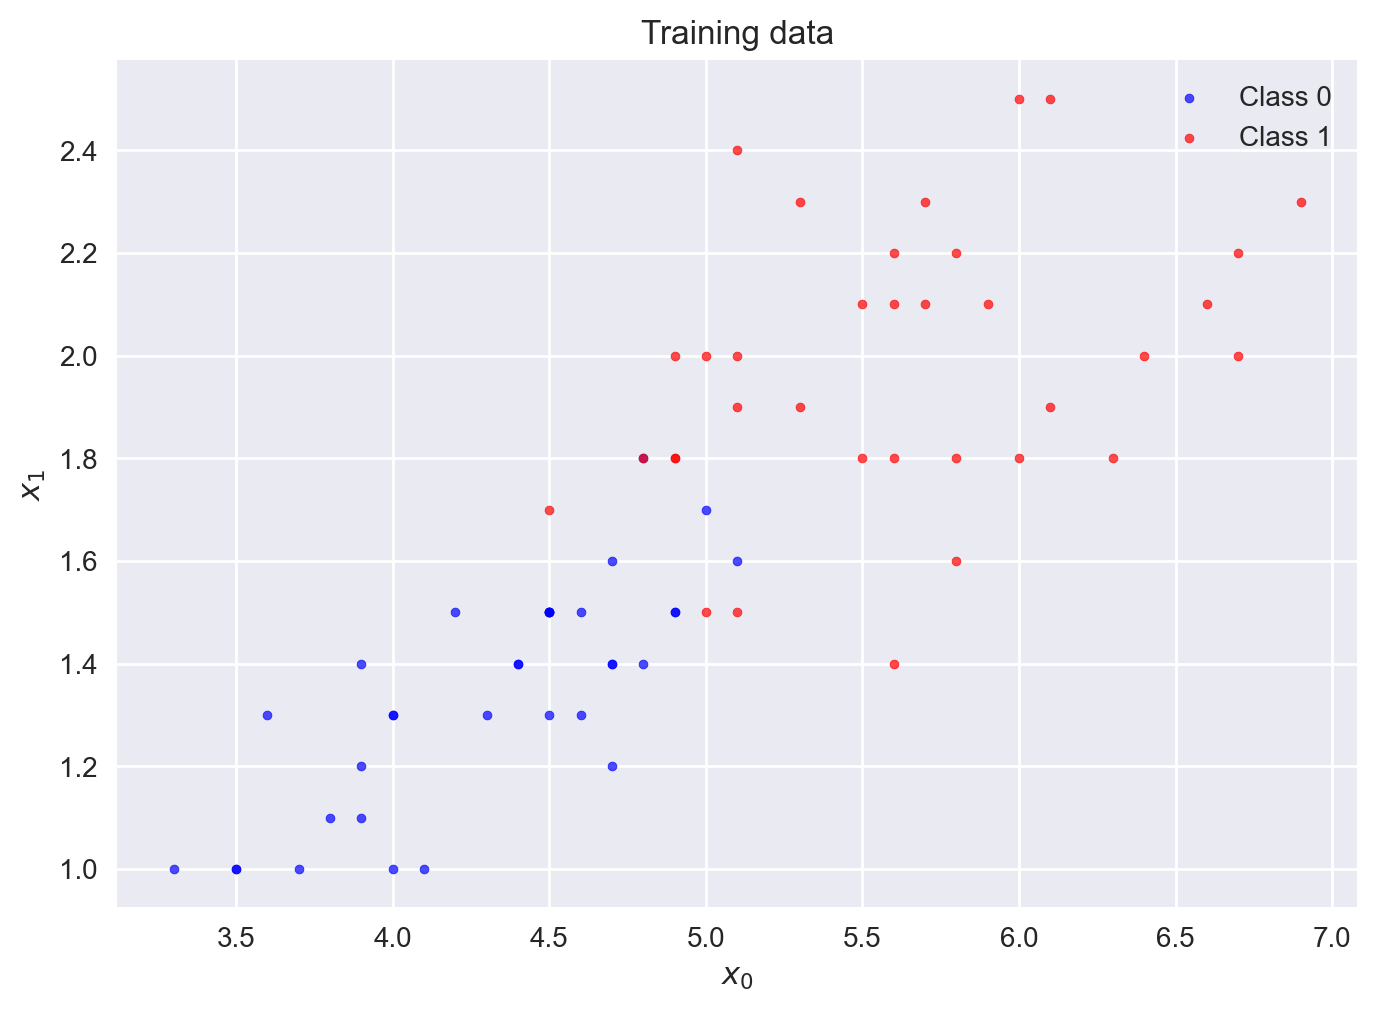

In [208]:
# Visualization of the training data.
plt.style.use("seaborn-v0_8")

fig = plt.figure()
plt.scatter(X_train[Y_train[:,0]==0, 0], 
            X_train[Y_train[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==+1, 0], 
            X_train[Y_train[:,0]==+1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()

#### Training Procedure

In [209]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu (x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def compute_derivative(activation, Z):
    if activation.__name__ == 'sigmoid':
        return sigmoid_derivative(Z)
    elif activation.__name__ == 'relu':
        return relu_derivative(Z)
    else:
        raise ValueError("undefined.")

In [210]:
# Gradient of loss function: L'(W1, b1, W2, b2).
def L_prime(activation, X, Y, W1, b1, W2, b2):
    """ L'(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the gradients: dL/dW1 (Shape: [2,3]), dL/db1 (Shape: [3,1]),
                          dL/dW2 (Shape: [3,1]), dL/db2 (Shape: [1,1]).
    """
    # Get dimensions.
    n = X.shape[0]
    
    ## Calculate feed-forward values.
    Z = X.dot(W1) + b1.T                                                        # Shape: [n, 3].
    H = activation(Z)                                                           # Shape: [n, 3].
    P = sigmoid((H.dot(W2) + b2.T))                                             # Shape: [n, 1].
    
    ## Back propogate the gradient flow for output layer dL/dW2, dL/db2.
    dL_by_dP = P - Y                                                            # Shape: [n,1].
    dP_by_dW2 = H                                                               # Shape: [n,3].
    dP_by_db2 = np.ones([n, 1])                                                 # Shape: [n,1].
    dP_by_dH = W2                                                               # Shape: [3,1] 
    dL_by_dW2 = dP_by_dW2.T.dot(dL_by_dP)                                       # Shape: [3,1].
    dL_by_db2 = dP_by_db2.T.dot(dL_by_dP)                                       # Shape: [1,1].
    dL_by_dH  = (dL_by_dP).dot(dP_by_dH.T)                                      # Shape: [n,3].
     
    # then for hidden layer dL/dW1, dL/db1.
    dH_by_dZ = compute_derivative(activation, Z)                             # Shape: [n,3].
    dL_by_dZ = dL_by_dH * dH_by_dZ                                              # Shape: [n,3].
    dZ_by_dW1 = X                                                               # Shape: [n,2].
    dZ_by_db1 = np.ones([n, 1])                                                 # Shape: [n,1].
    dL_by_dW1  = dZ_by_dW1.T.dot(dL_by_dH * dH_by_dZ)                           # Shape: [2,3].
    dL_by_db1  = (dL_by_dH * dH_by_dZ).T.dot(dZ_by_db1)                         # Shape: [3,1].

    # Return the gradients.
    return dL_by_dW1, dL_by_db1, dL_by_dW2, dL_by_db2

In [211]:
def L(activation, X, Y, W1, b1, W2, b2):
    """ L(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the loss.       Shape: Scalar.
    """
    # Get dimensions.
    n = X.shape[0]
    
    ## Calculate feed-forward values.
    H = activation(X.dot(W1) + b1.T)                            # Shape: [n, 3].
    P = sigmoid((H.dot(W2) + b2.T))                            # Shape: [n, 1].
    
    epsilon = 1e-15
    P_clipped = np.clip(P, 0, 1 - epsilon)
    
    ## Get the loss.
    L = -np.sum(Y * P + (1 - Y) * np.log(1 - P_clipped))                        # Shape: Scalar.
    
    return L

#### Fixed Initialization

In [212]:
def init_weight_bias_fixed(state_id=0):
    np.random.seed(state_id)
    W1 = np.random.randn(2,6)/((2*6)**2)   # Weight matrix 1.
    b1 = np.random.randn(6,1)/((6*1)**2)   # Bias vector 1.
    W2 = np.random.randn(6,1)/((6*1)**2)   # Weight matrix 2.
    b2 = np.random.randn(1,1)/((1*1)**2)   # Bias vector 2.
    return W1, b1, W2, b2

#### Xavier Initilization

In [213]:
""" Xavier initialization is used for sigmoid and tanh activation functions."""
def init_weight_bias_xavier(input_layer=2, hidden_layer=3, state_id=0):
    np.random.seed(state_id)    
    W1 = np.random.randn(input_layer, hidden_layer) / np.sqrt(input_layer)   # Weight matrix 1.
    b1 = np.zeros([hidden_layer,1])                     # Bias vector 1.
    
    W2 = np.random.randn(hidden_layer,1) / np.sqrt(hidden_layer)   # Weight matrix 2.
    b2 = np.zeros([1,1])                     # Bias vector 2.

    return W1, b1, W2, b2

In [214]:
""" He initialization is used for ReLU activation function. """
def init_weight_bias_he(input_layer=2, hidden_layer=3, state_id=0):
    np.random.seed(state_id)    
    W1 = np.random.randn(input_layer, hidden_layer) * np.sqrt(2/input_layer)   # Weight matrix 1.
    b1 = np.zeros([hidden_layer,1]) + 0.01                                     # Bias vector 1.
    
    W2 = np.random.randn(hidden_layer,1) * np.sqrt(2/hidden_layer)             # Weight matrix 2.
    b2 = np.zeros([1,1]) + 0.01                                                # Bias vector 2.

    return W1, b1, W2, b2

#### Training Function
Including batch_size parameter to enable stochastic gradient descent

In [215]:
import random
def fit(X_train, Y_train, W1, b1, W2, b2, activation, 
        n_iter, learning_rate_start, learning_rate_end, 
        batch_size=None, rho_start = 0.5, rho_end = 0.99):
    # We will keep track of training loss over iterations.
    iterations = [0]
    print(L(activation, X_train, Y_train, W1, b1, W2, b2))
    L_list = [L(activation, X_train, Y_train, W1, b1, W2, b2)]
    
    X_and_Y_train = np.hstack((X_train, Y_train))
    
    # initialize velocity for momentum
    V_W1, V_B1, V_W2, V_B2 = np.zeros(W1.shape), np.zeros(b1.shape), np.zeros(W2.shape), np.zeros(b2.shape)
    
    rho = rho_start
    rho_anneal = (rho_end - rho_start) / n_iter
    learning_rate = learning_rate_start
    learning_rate_anneal = (learning_rate_end - learning_rate_start) / n_iter
    
    for i in range(n_iter):        
        # initialize batch before if statement to have access
        batch_X_train = X_train.copy()
        batch_Y_train = Y_train.copy()
        
        # if option is given, do training in mini-batch
        if batch_size is not None:
            batch = np.array(random.choices(X_and_Y_train, k=batch_size))
            batch_X_train = batch[:,0:2]
            batch_Y_train = batch[:,2].reshape(-1,1)  
        
        ## Calculate current gradients
        gradient_W1, gradient_b1, gradient_W2, gradient_b2 = L_prime(activation, batch_X_train, batch_Y_train, W1, b1, W2, b2)
                
        rho += rho_anneal
        learning_rate += learning_rate_anneal        
                
        # # Calcluate velocity to overcome saddle point 
        V_W1 = rho * V_W1 + gradient_W1
        V_B1 = rho * V_B1 + gradient_b1
        V_W2 = rho * V_W2 + gradient_W2
        V_B2 = rho * V_B2 + gradient_b2
        
        # # Perform SGD + Momentum
        W1_new = W1 - learning_rate * V_W1
        b1_new = b1 - learning_rate * V_B1
        W2_new = W2 - learning_rate * V_W2
        b2_new = b2 - learning_rate * V_B2
        
        ## Perform standard gradient descent
        # W1_new = W1 - learning_rate * gradient_W1
        # b1_new = b1 - learning_rate * gradient_b1
        # W2_new = W2 - learning_rate * gradient_W2
        # b2_new = b2 - learning_rate * gradient_b2
        
        iterations.append(i+1)
        L_list.append(L(activation, X_train, Y_train, W1_new, b1_new, W2_new, b2_new))
        
        # L1-norm of weight/bias changing.
        norm = np.abs(W1_new-W1).sum() + np.abs(b1_new-b1).sum() + \
            np.abs(W2_new-W2).sum() + np.abs(b2_new-b2).sum() 
        
        if i%40000 == 0 or i+1 == n_iter:
            print('i: {:6d} L: {:.3f} norm:{:.6f}'.format(i, L_list[-1], norm))
            
        W1 = W1_new
        b1 = b1_new
        W2 = W2_new
        b2 = b2_new
        
    print ('W1 matrix: \n' + str(W1))
    print ('b1 vector: \n' + str(b1))
    print ('W2 matrix: \n' + str(W2))
    print ('b2 vector: \n' + str(b2))
    return W1, b1, W2, b2, iterations, L_list


In [226]:
W1, b1, W2, b2 = init_weight_bias_he(input_layer=2, hidden_layer=100, state_id=0)
activation = relu
W1, b1, W2, b2, iterations, L_list = fit(X_train, Y_train, W1, b1, W2, b2, activation,
                                         n_iter = 400000, 
                                         learning_rate_start = 0.0015, learning_rate_end = 0.00001,
                                         batch_size=5,
                                         rho_start = 0.5, rho_end = 0.99)


85.6759447045614
i:      0 L: 93.023 norm:0.039168
i:  40000 L: -33.598 norm:0.152258
i:  80000 L: -33.464 norm:0.327665
i: 120000 L: -34.335 norm:0.029887
i: 160000 L: -33.674 norm:0.052844
i: 200000 L: -33.809 norm:0.211740
i: 240000 L: -34.793 norm:0.009714
i: 280000 L: -35.039 norm:0.069288
i: 320000 L: -34.516 norm:0.012645
i: 360000 L: -35.255 norm:0.056067
i: 399999 L: -35.020 norm:0.000859
W1 matrix: 
[[-1.43786026e-01  8.50624657e-01  9.29457847e-01  2.43771910e-01
   6.65977284e-01 -9.77277880e-01  2.22969583e-01 -1.51357208e-01
  -1.74936094e-01 -1.66919983e-01  4.25728117e-03  9.55478865e-02
   5.73649464e-01 -3.32343107e-01 -1.82616449e-02 -2.11763581e-01
   1.77074830e-02 -2.05158264e-01  4.64668085e-01 -8.54095739e-01
  -2.55298982e+00  3.23776285e-01 -4.91524824e-02 -7.42165020e-01
   2.48127024e-01 -1.45436567e+00  4.57585173e-02 -1.86241793e-01
  -8.75668094e-02  3.18578049e-02  1.54947426e-01 -1.78219260e-01
  -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.032851

#### Training Loss Curve

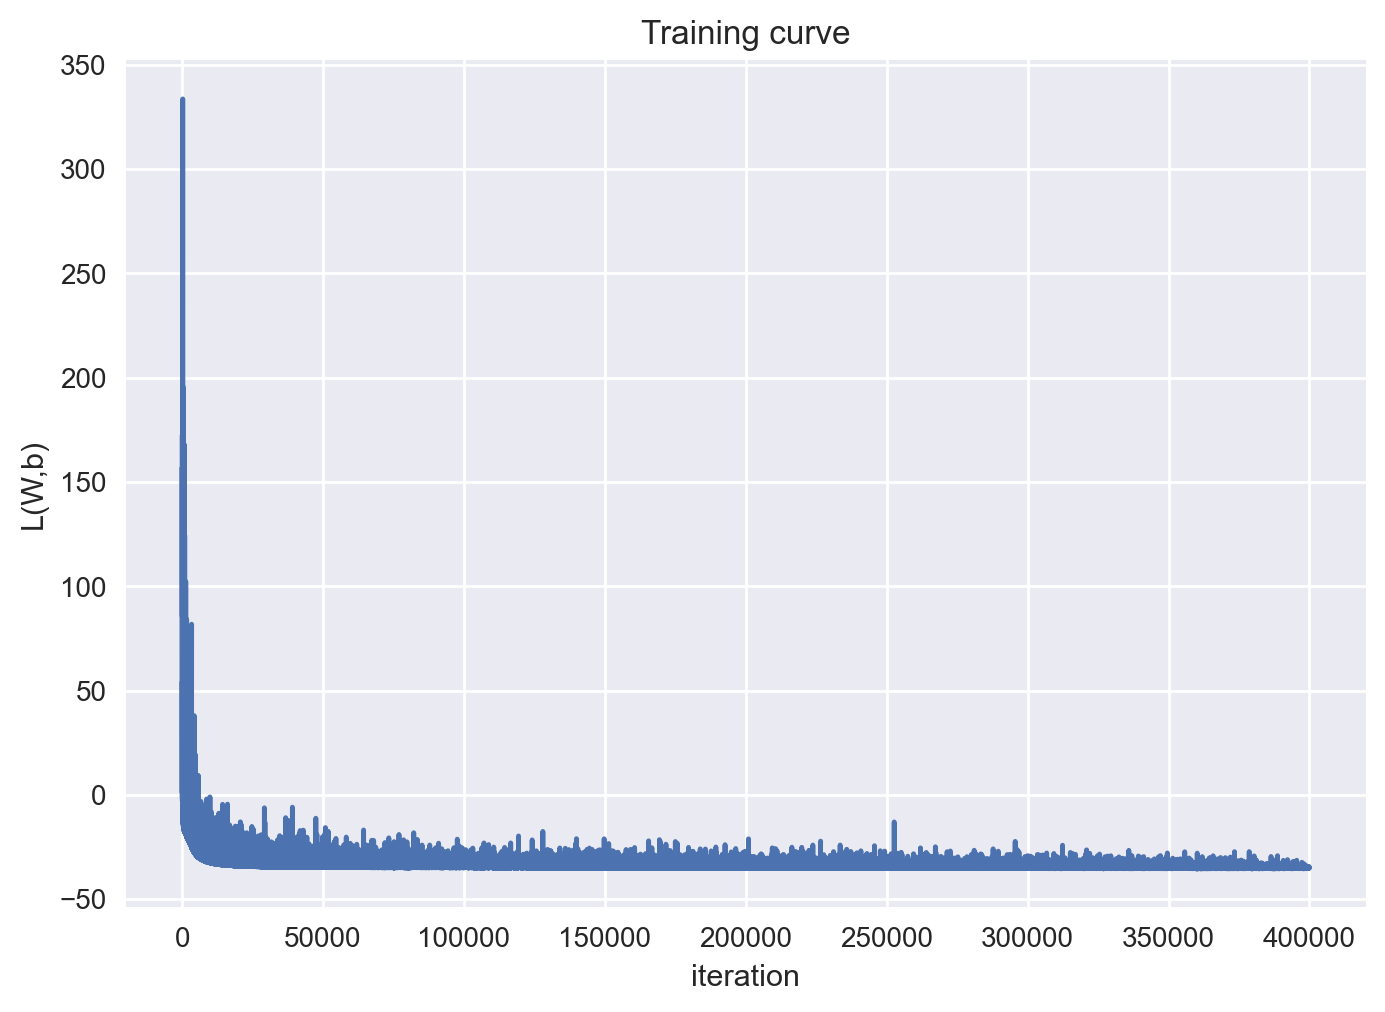

In [236]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
# plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.plot(iterations, L_list) 
plt.show()

#### Results on Training Data

In [237]:
# Prepare for decision boundary.
num = 100

X0_plane_range = np.linspace(1,7,num)
X1_plane_range = np.linspace(0,2.6,num)

X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X_decision = np.stack([X0_plane.reshape(-1), X1_plane.reshape(-1)]).T

# Calculate feed-forward values.
f_decision = activation(X_decision.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_decision = np.ones_like(f_decision)  # Define yhat_decision as an array of ones with the same shape as f_decision.
yhat_decision[f_decision<0] = 0

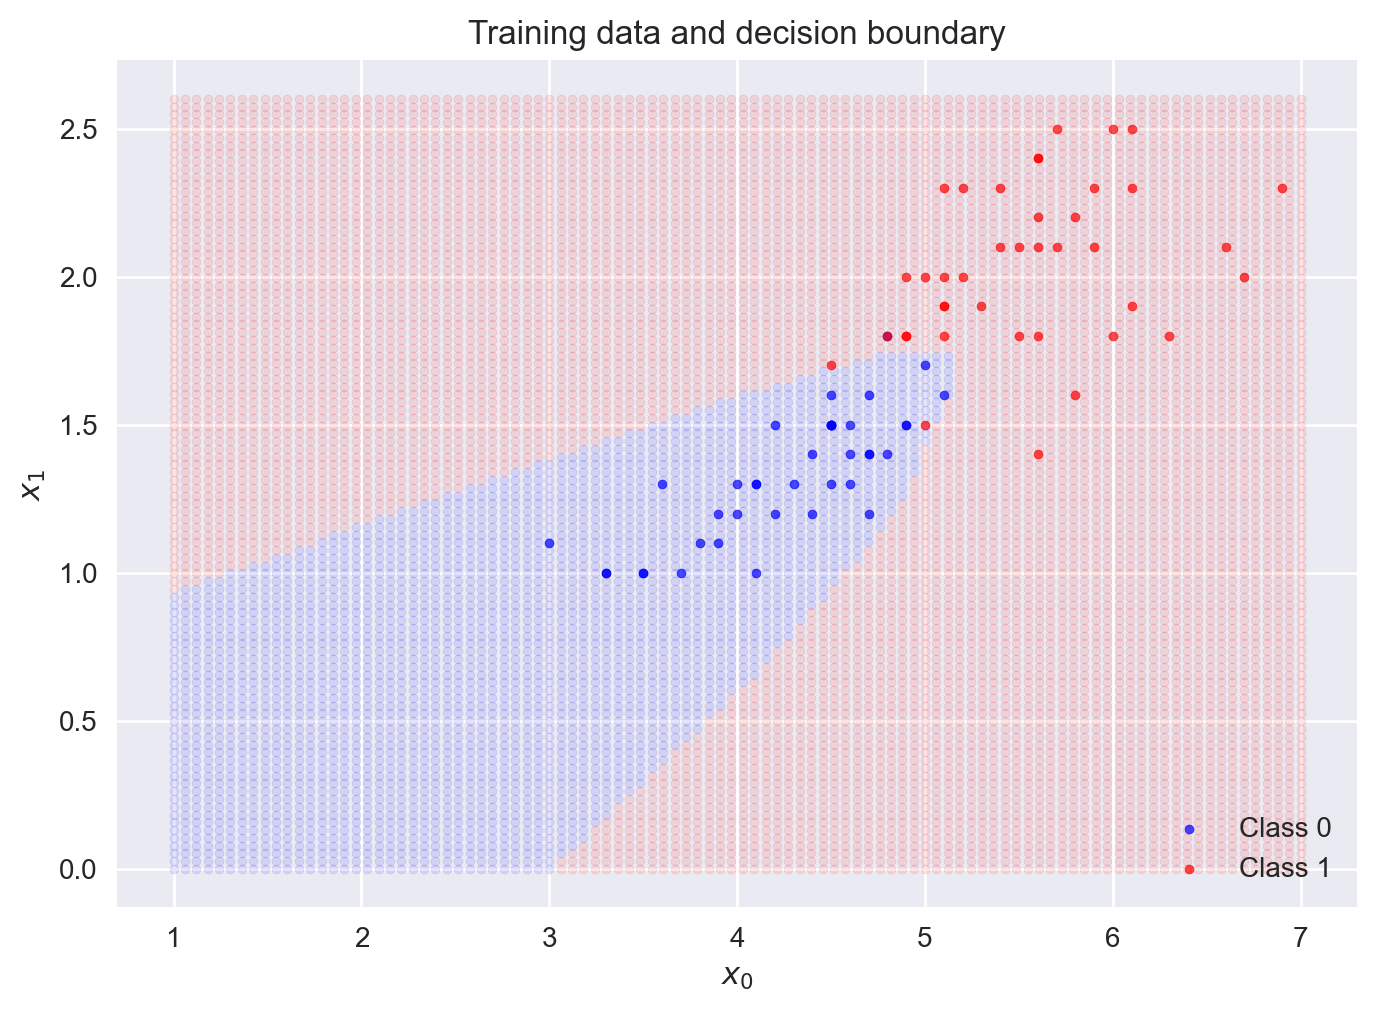

In [238]:
# Training data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], 
            X_decision[yhat_decision[:,0]==0, 1], 
            marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], 
            X_decision[yhat_decision[:,0]==1, 1], 
            marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_train[Y_train[:,0]==0, 0], 
            X_train[Y_train[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], 
            X_train[Y_train[:,0]==1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [239]:
# Calculate the train error.
f_train = activation(X_train.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_train = np.ones_like(f_train)
yhat_train[f_train<0] = 0
train_error = 1 - np.sum(yhat_train == Y_train) / Y_train.shape[0]
print('Train error: {}'.format(train_error))

Train error: 0.025000000000000022


#### Results on Test Data

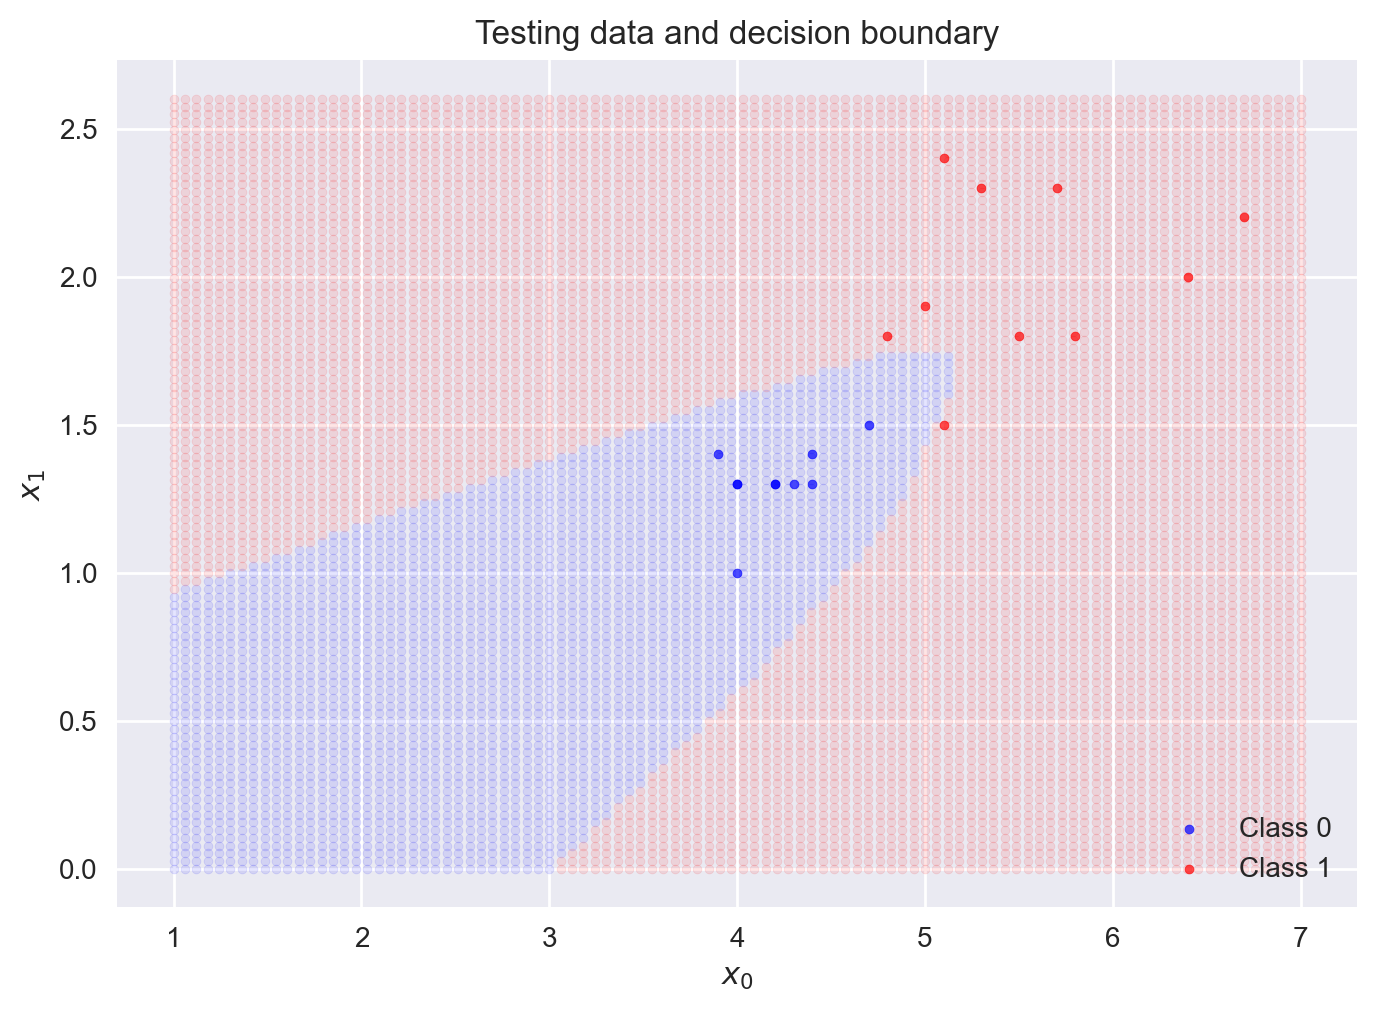

In [240]:
# Test data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], 
            X_decision[yhat_decision[:,0]==0, 1], 
            marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], 
            X_decision[yhat_decision[:,0]==1, 1], 
            marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_test[Y_test[:,0]==0, 0], 
            X_test[Y_test[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_test[Y_test[:,0]==1, 0], 
            X_test[Y_test[:,0]==1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Testing data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [241]:
# Calculate the test error.
f_test = activation(X_test.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_test = np.ones_like(f_test)
yhat_test[f_test<0] = 0
test_error = 1 - np.sum(yhat_test == Y_test) / Y_test.shape[0]
print('Test error: {}'.format(test_error))

Test error: 0.0


### Adding K-Fold Cross Validation

In [242]:
from sklearn.model_selection import KFold

# break the data into 5 fold, and shuffle the data, use state 0 for reproducibility.
five_fold_0 = KFold(n_splits=5, shuffle=True, random_state=0)

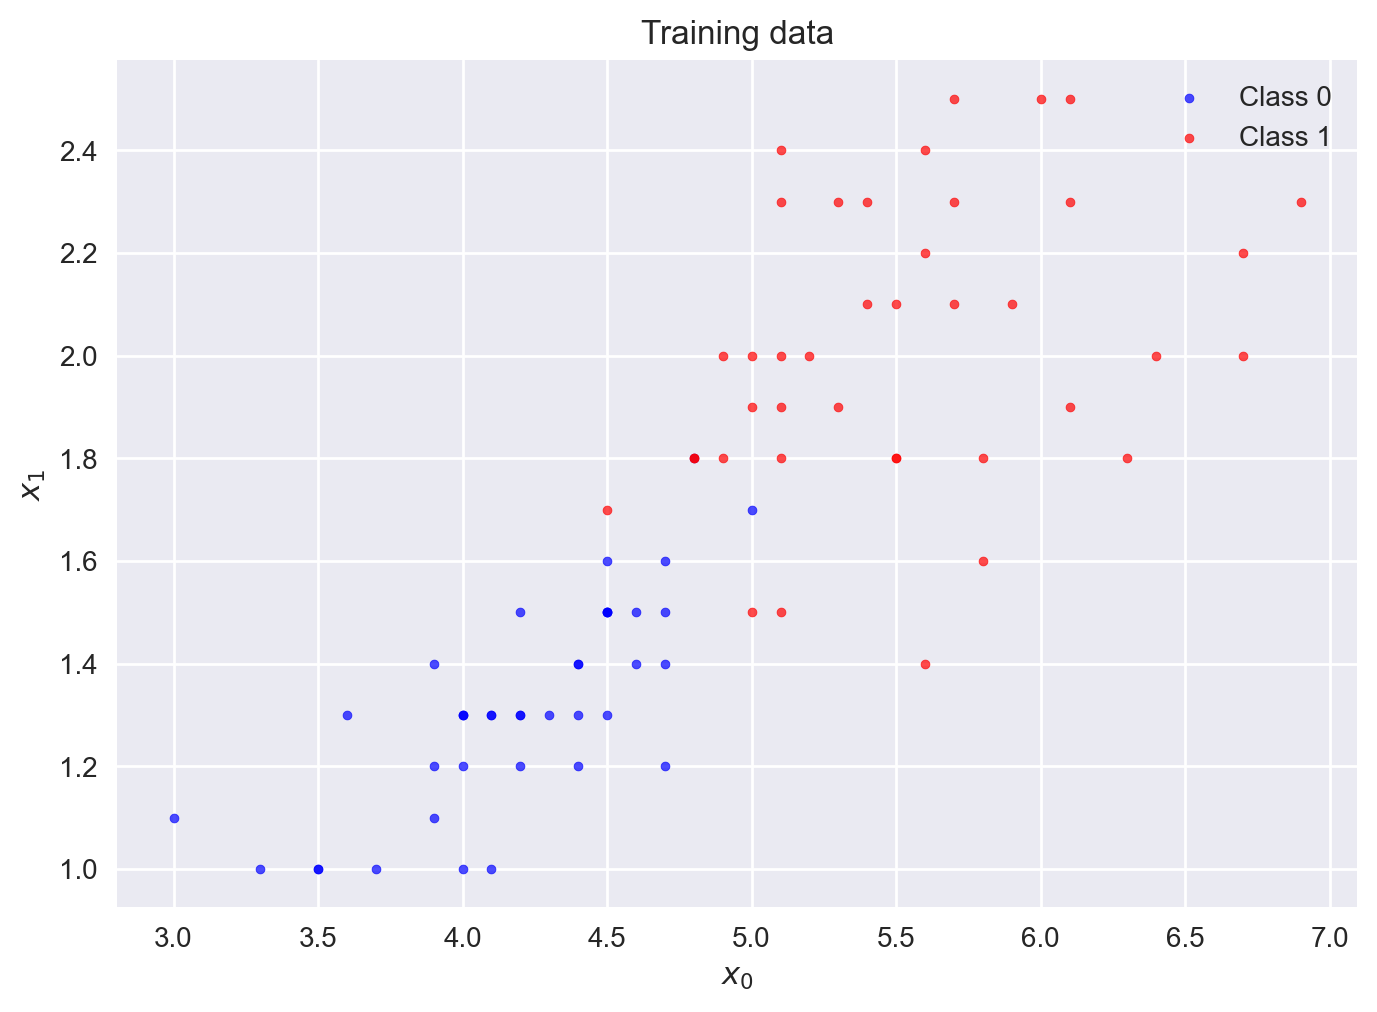

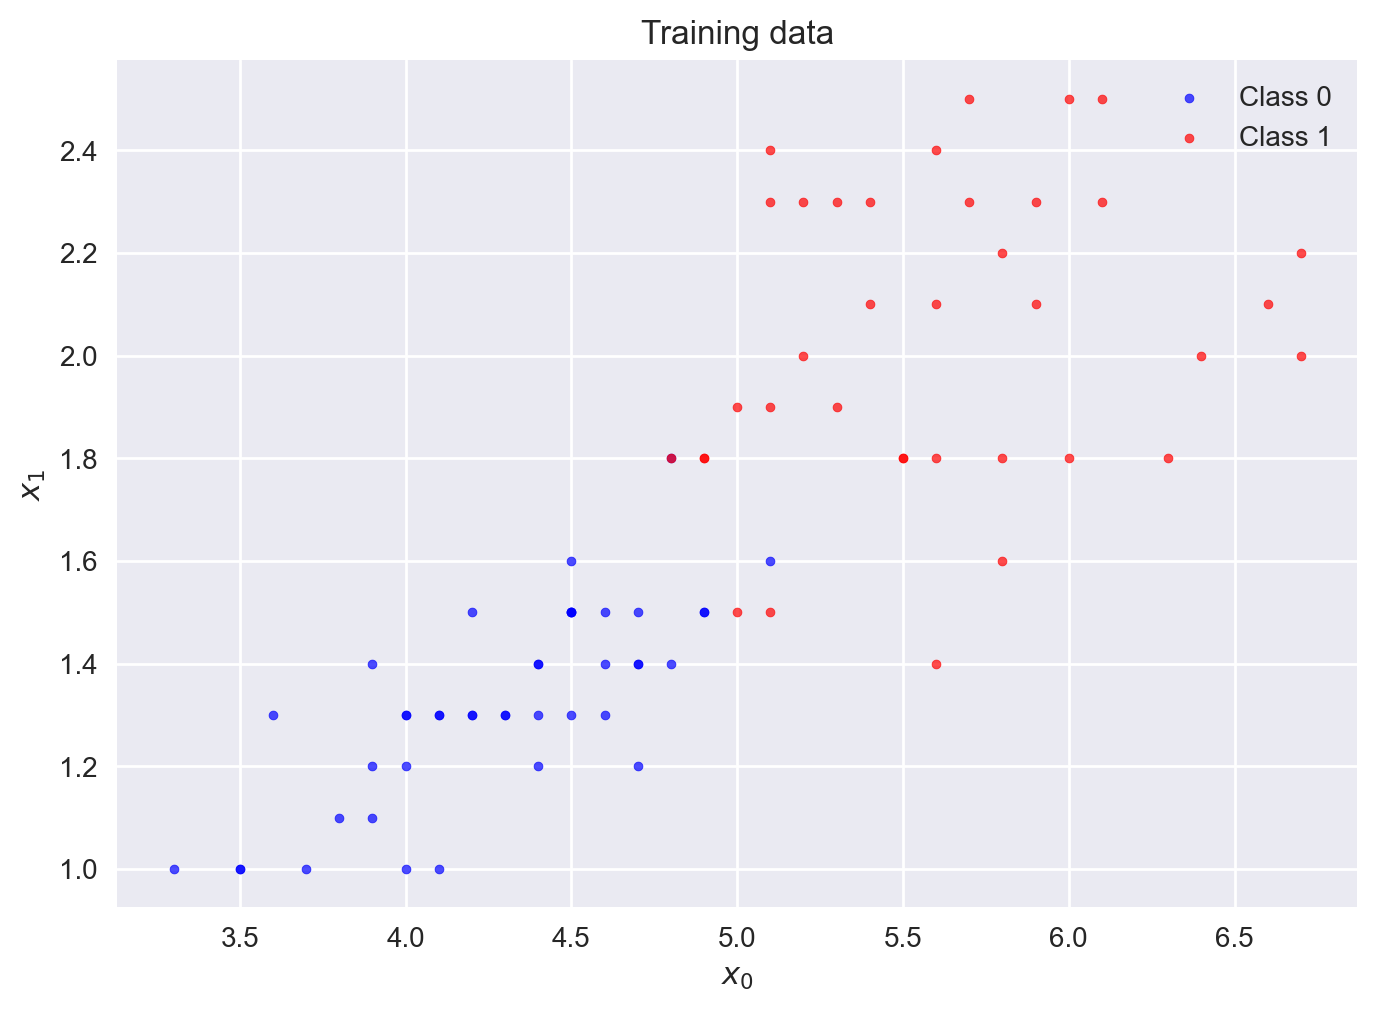

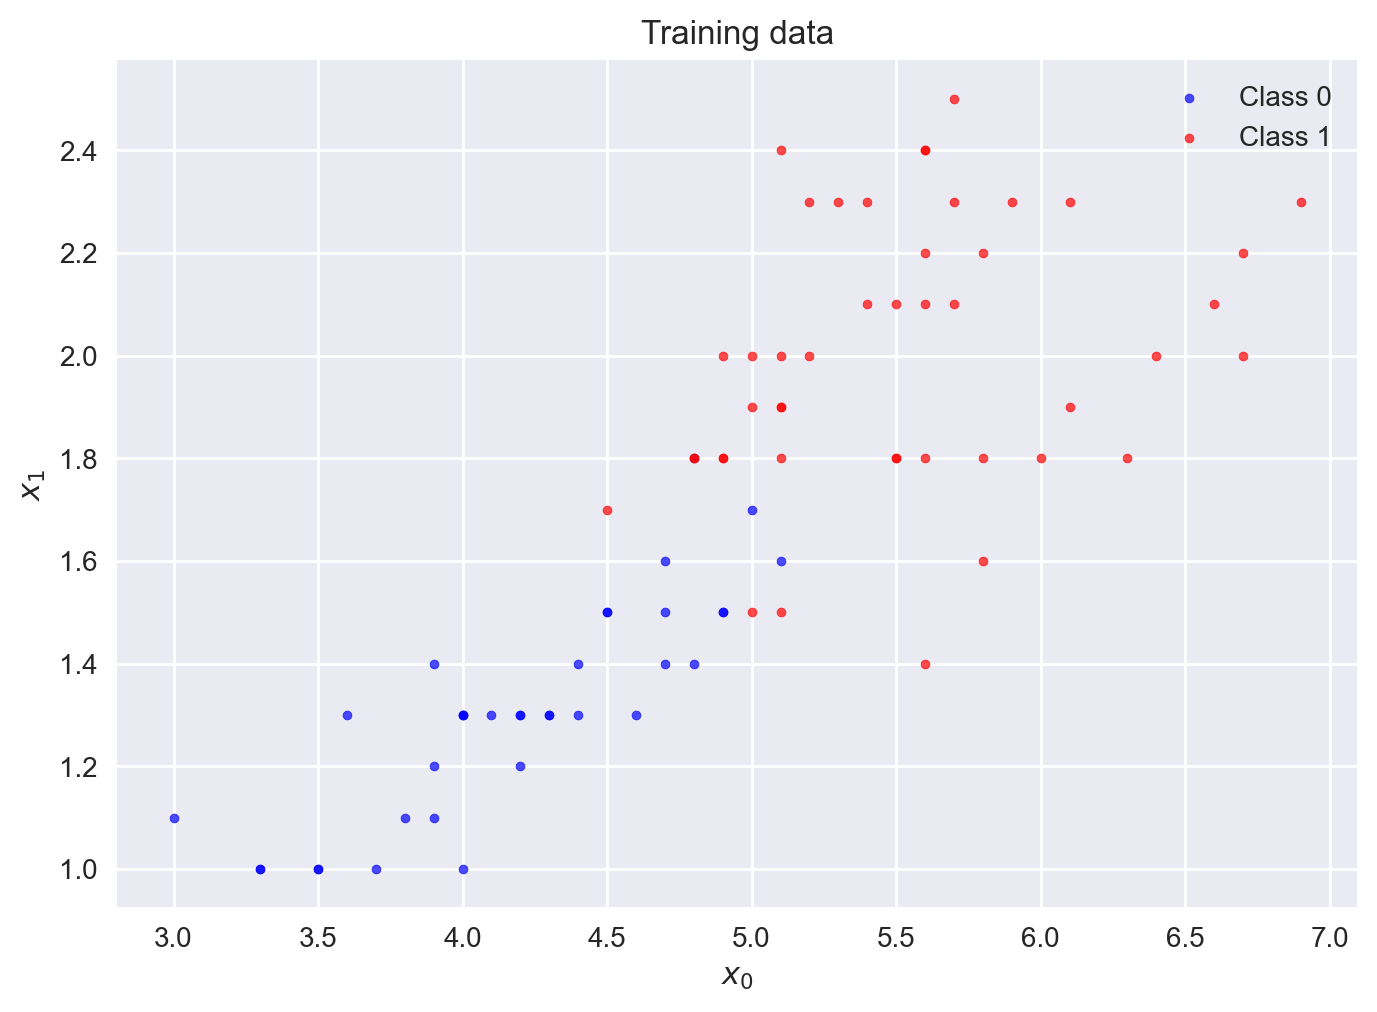

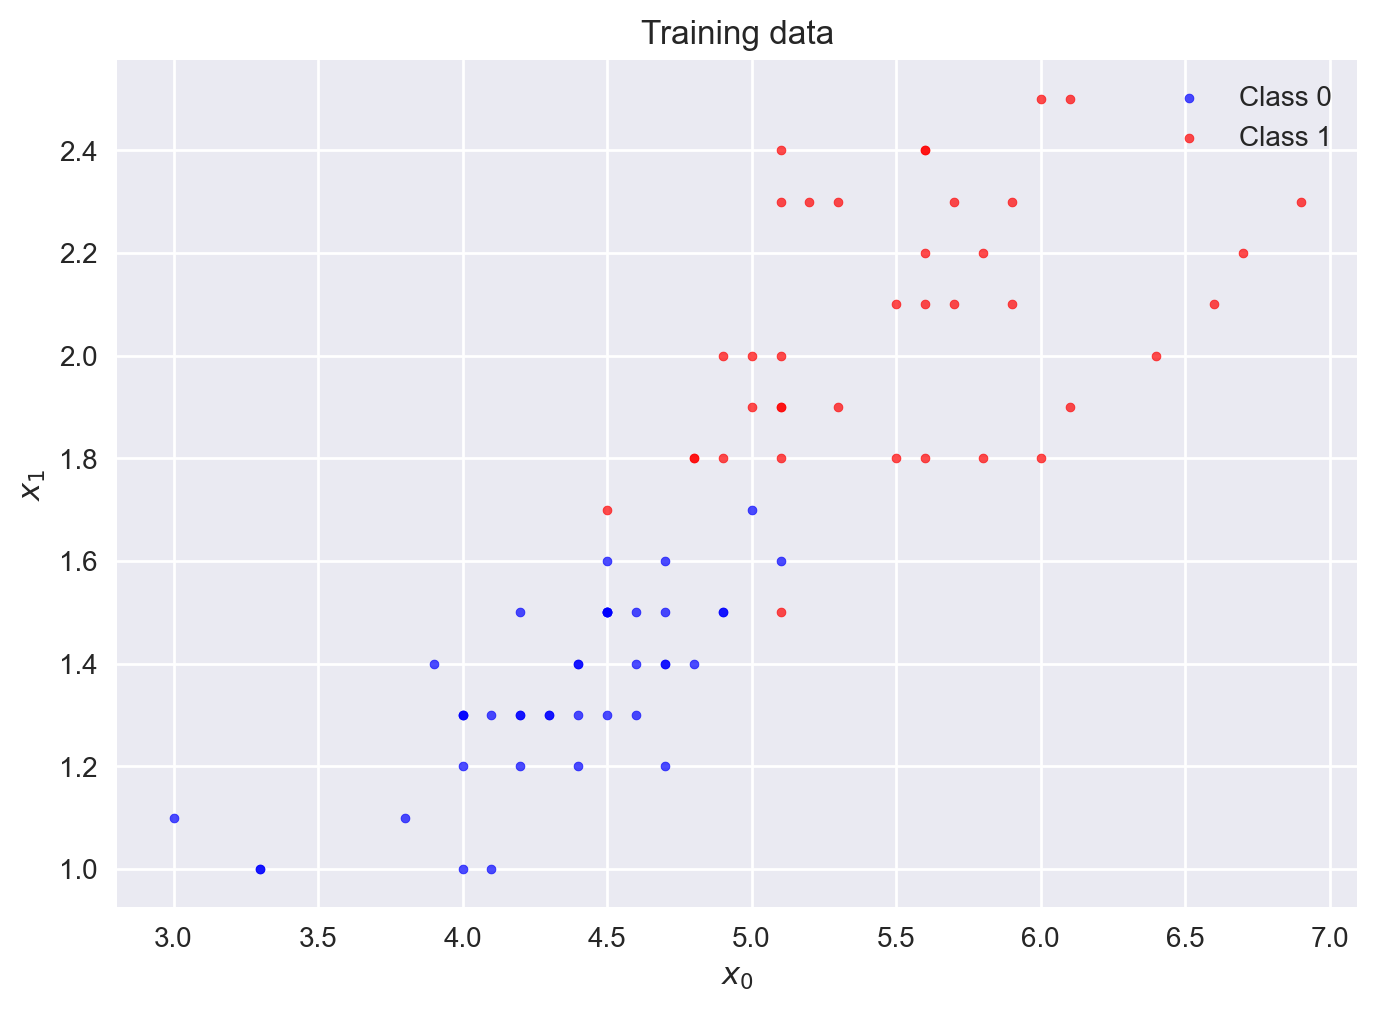

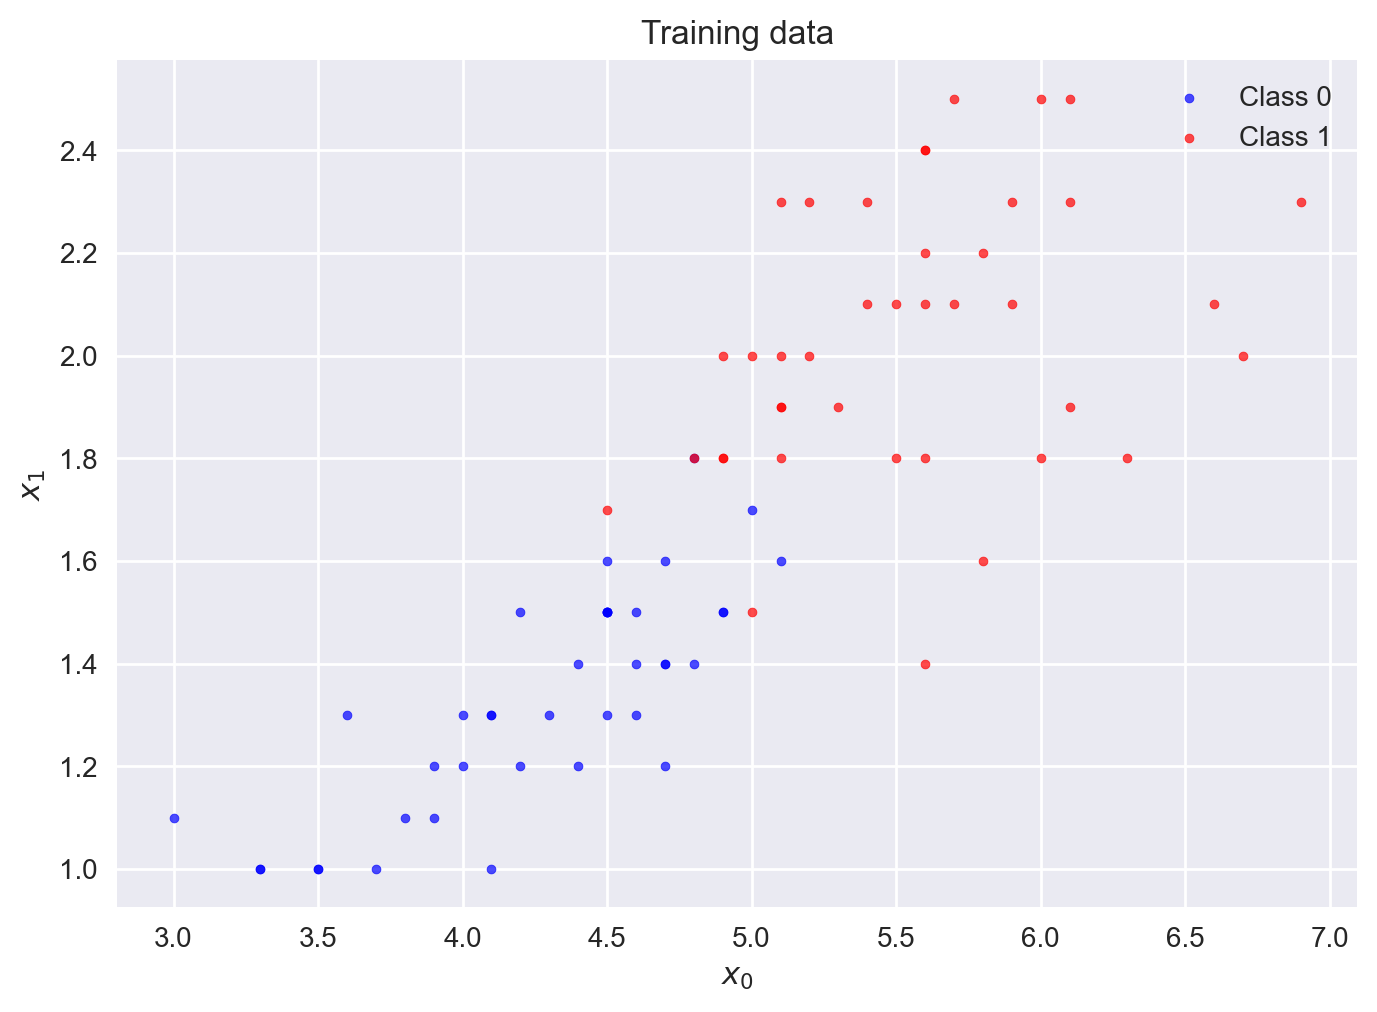

In [243]:
# using 5-fold from sklearn to generate train and test set indices
for train, test in five_fold_0.split(new_X):
    # array indexing the train and test set
    X_train, Y_train, X_test, Y_test = new_X[train], new_Y[train], new_X[test], new_Y[test]
    
    # Visualization of the training data.
    plt.style.use("seaborn-v0_8")

    fig = plt.figure()
    plt.scatter(X_train[Y_train[:,0]==0, 0], 
                X_train[Y_train[:,0]==0, 1], 
                marker='o', color='b', alpha=0.7, s=10, label='Class 0')
    plt.scatter(X_train[Y_train[:,0]==+1, 0], 
                X_train[Y_train[:,0]==+1, 1], 
                marker='o', color='r', alpha=0.7, s=10, label='Class 1')

    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.legend(loc='upper right', fontsize=10)
    plt.title('Training data')
    plt.show()
    


In [244]:
# using 5-fold from sklearn to generate train and test set indices
for train, test in five_fold_0.split(new_X):
    # array indexing the train and test set
    X_train, Y_train, X_test, Y_test = new_X[train], new_Y[train], new_X[test], new_Y[test]
    ## The following codes might take a while to run, please be patient
